# Rajat Sharma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('otto.csv')

### (Load the original data, print out the exact number of instances and number of classes)

In [3]:
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
df.shape

(61878, 95)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [6]:
df.describe(include='all')

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Class_2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16122
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135,NaN
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720,NaN
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


### (handle missing values in the dataset, remove non-numerical class labels if there exists any, and filtering out rows with all zero values.)

In [7]:
print("Counts null for each column:")
print(df.isnull().sum())

Counts null for each column:
id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64


In [8]:
df = df.dropna()

In [9]:
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [10]:
df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [11]:
df["target"] = df["target"].astype('category')
df["target"] = df["target"].cat.codes
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int8

In [12]:
X = df.drop(['target'],axis=1).values   
y = df['target'].values

### (Split the original data into two parts: 80% for training and 20% for testing.)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)


## Algorithm Implementation

### (KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(classification_report(y_test , knn_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00      3262
           2       1.00      1.00      1.00      1562
           3       1.00      1.00      1.00       558
           4       1.00      1.00      1.00       559
           5       1.00      1.00      1.00      2843
           6       1.00      1.00      1.00       534
           7       1.00      1.00      1.00      1653
           8       1.00      1.00      1.00      1005

    accuracy                           1.00     12376
   macro avg       1.00      1.00      1.00     12376
weighted avg       1.00      1.00      1.00     12376



In [15]:
accuracy_score(y_test, knn_predictions)*100

100.0

### (Logistic Regression)

In [36]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression() 

lor.fit(X_train, y_train) 

import re
lor_predictions  = lor.predict(X_test)
print(lor_predictions)
print(lor.score(X_test, y_test)*100)


[8 2 2 ... 2 4 5]
77.1978021978022


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### (Linear Regression)

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
#training
lr.fit(X_train, y_train) 

LinearRegression()

In [17]:
import re
lr_predictions  = lr.predict(X_test)
print(lr_predictions)
print(lr.score(X_test, y_test)*100)

[7.98614484 1.84115703 1.65916434 ... 2.66024387 3.68741063 4.36772916]
96.14496783109361


### (Decision Tree)

In [34]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

import re
dt_predictions  = dt.predict(X_test)
print(classification_report(y_test , dt_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00      3262
           2       1.00      1.00      1.00      1562
           3       1.00      1.00      1.00       558
           4       1.00      1.00      1.00       559
           5       1.00      1.00      1.00      2843
           6       1.00      1.00      1.00       534
           7       1.00      1.00      1.00      1653
           8       1.00      1.00      1.00      1005

    accuracy                           1.00     12376
   macro avg       1.00      1.00      1.00     12376
weighted avg       1.00      1.00      1.00     12376



### (Random Forest)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000,max_depth = 5, class_weight = 'balanced',random_state= 3)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=1000,
                       random_state=3)

In [19]:
import re
rf_predictions  = rf.predict(X_test)
print(classification_report(y_test , rf_predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       400
           1       1.00      0.97      0.98      3262
           2       0.98      0.91      0.94      1562
           3       0.65      0.91      0.76       558
           4       0.71      0.97      0.82       559
           5       0.98      0.85      0.91      2843
           6       0.65      0.70      0.67       534
           7       0.93      0.92      0.92      1653
           8       0.89      1.00      0.94      1005

    accuracy                           0.92     12376
   macro avg       0.86      0.91      0.88     12376
weighted avg       0.93      0.92      0.92     12376



In [20]:
accuracy_score(y_test, rf_predictions)*100

91.54815772462831

### (Neural Network)

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)
mlp_predictions = mlp.predict(X_test)
print(classification_report(y_test , mlp_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       400
           1       0.97      1.00      0.98      3262
           2       0.95      0.94      0.95      1562
           3       0.98      0.85      0.91       558
           4       0.96      0.99      0.98       559
           5       0.98      0.99      0.98      2843
           6       0.95      0.88      0.91       534
           7       0.98      0.96      0.97      1653
           8       0.95      0.99      0.97      1005

    accuracy                           0.97     12376
   macro avg       0.97      0.95      0.96     12376
weighted avg       0.97      0.97      0.97     12376



In [22]:
accuracy_score(y_test, mlp_predictions)*100

97.03458306399483

### (Naive Bayes)

In [23]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
nb_predictions  = clf.predict(X_test)
print(classification_report(y_test , nb_predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       400
           1       0.86      0.63      0.73      3262
           2       0.46      0.29      0.35      1562
           3       0.23      0.78      0.35       558
           4       0.70      0.97      0.81       559
           5       0.93      0.80      0.86      2843
           6       0.54      0.63      0.58       534
           7       0.91      0.68      0.78      1653
           8       0.57      0.92      0.71      1005

    accuracy                           0.69     12376
   macro avg       0.68      0.73      0.68     12376
weighted avg       0.76      0.69      0.70     12376



In [24]:
accuracy_score(y_test, nb_predictions)*100

68.80252100840336

### (AdaBoost)

In [25]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Training
model = abc.fit(X_train, y_train)
abc_predictions = model.predict(X_test)
print(classification_report(y_test , abc_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00      3262
           2       0.00      0.00      0.00      1562
           3       0.00      0.00      0.00       558
           4       0.00      0.00      0.00       559
           5       0.37      1.00      0.54      2843
           6       0.00      0.00      0.00       534
           7       0.00      0.00      0.00      1653
           8       1.00      1.00      1.00      1005

    accuracy                           0.61     12376
   macro avg       0.37      0.44      0.39     12376
weighted avg       0.46      0.61      0.50     12376



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
accuracy_score(y_test, abc_predictions)*100

60.681965093729794

## Comparision

<AxesSubplot:>

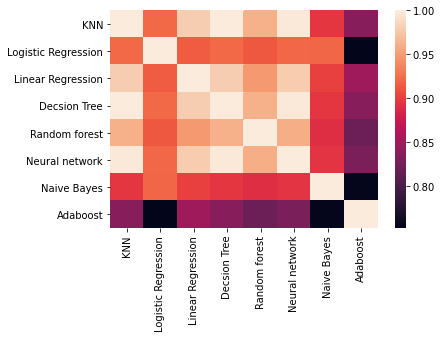

In [37]:
df = {'KNN': knn_predictions, 'Logistic Regression': lor_predictions, 'Linear Regression': lr_predictions, 'Decsion Tree':dt_predictions, 'Random forest':rf_predictions,'Neural network':mlp_predictions,'Naive Bayes':nb_predictions,'Adaboost':abc_predictions}
d = pd.DataFrame(df)
corr = d.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)